<a href="https://colab.research.google.com/github/dtphuong2612/Data_Preparing/blob/main/homework07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Data Red Wine

In [129]:
dt_red = pd.read_csv("/content/drive/MyDrive/DSEB_61/Data Pre/Data/winequality-red.csv")
dt_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [130]:
dt_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


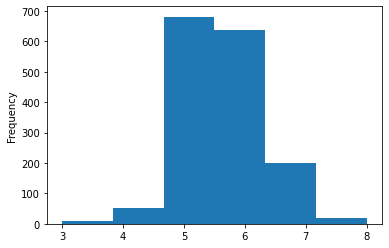

In [131]:
dt_red['quality'].plot(kind='hist', bins=6)

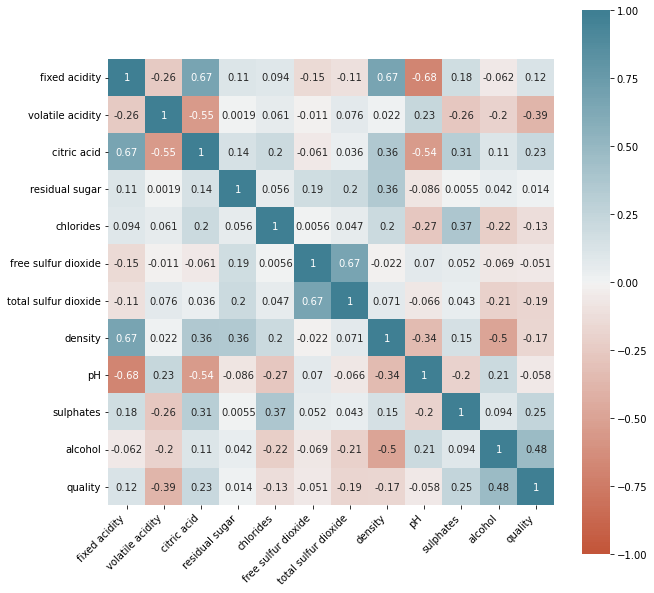

In [132]:
cor = dt_red.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


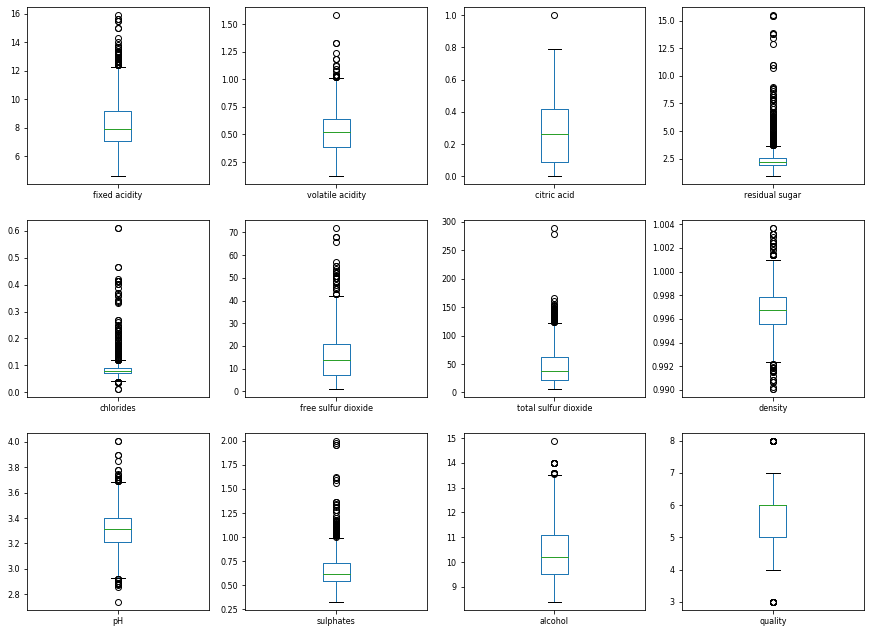

In [133]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt_red.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [134]:
#Remove outlier
for col in dt_red.columns:
  q75, q25 = np.percentile(dt_red[col], [75 ,25])
  iqr = q75 - q25
  dt_red=dt_red[dt_red[col].between(q25-1.5*iqr, q75+1.5*iqr)]
dt_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


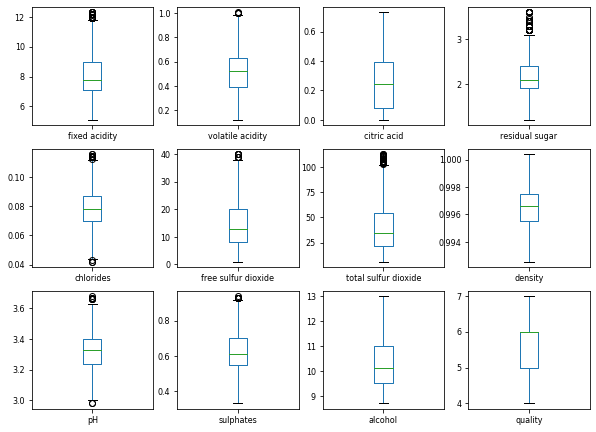

In [135]:
# after remover outlier
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dt_red.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

Linear Regression

In [136]:
x_train, x_test, y_train, y_test=train_test_split(dt_red.drop(columns='quality'), 
                                                  dt_red['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

md_wine=LinearRegression()
md_wine.fit(x_train, y_train)
prediction=md_wine.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.41074645316717373
MSE score: 0.2913544278244602
Accuracy score: 0.6512455516014235


In [137]:
#SVR with GridSearchCV
scaler= StandardScaler()
scaled_data=scaler.fit_transform(dt_red.drop(columns='quality'))

x_train, x_test, y_train, y_test=train_test_split(scaled_data, dt_red['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(x_train, y_train)

prediction=clf.best_estimator_.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

R2 score: 0.22988064136058606
MSE score: 0.3807829181494662
Accuracy score: 0.6512455516014235


In [138]:
#KNN
scaled_data=scaler.fit_transform(dt_red.drop(columns='quality'))

X_train, X_test, Y_train, Y_test=train_test_split(scaled_data, dt_red['quality'], 
                                                  test_size=0.25,
                                                  random_state=42)

scaler = StandardScaler()
k_values = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10,shuffle=True ,  random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

prediction=grid_result.best_estimator_.predict(x_test)
print('R2 score:', r2_score(y_test, prediction))
print('MSE score:', mean_squared_error(y_test, prediction))
print('Accuracy score:', accuracy_score(y_test, np.round(prediction)))

Best: -0.375532 using {'n_neighbors': 8}
R2 score: 0.35223605348086673
MSE score: 0.3202846975088968
Accuracy score: 0.608540925266904


Data Car Price


In [139]:
car = pd.read_csv("/content/drive/MyDrive/DSEB_61/Data Pre/Data/CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [140]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

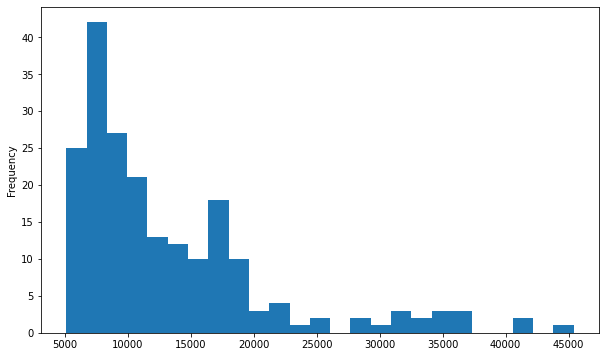

In [141]:
fig = plt.figure(figsize = (10,6))
car['price'].plot(kind='hist', bins=25)

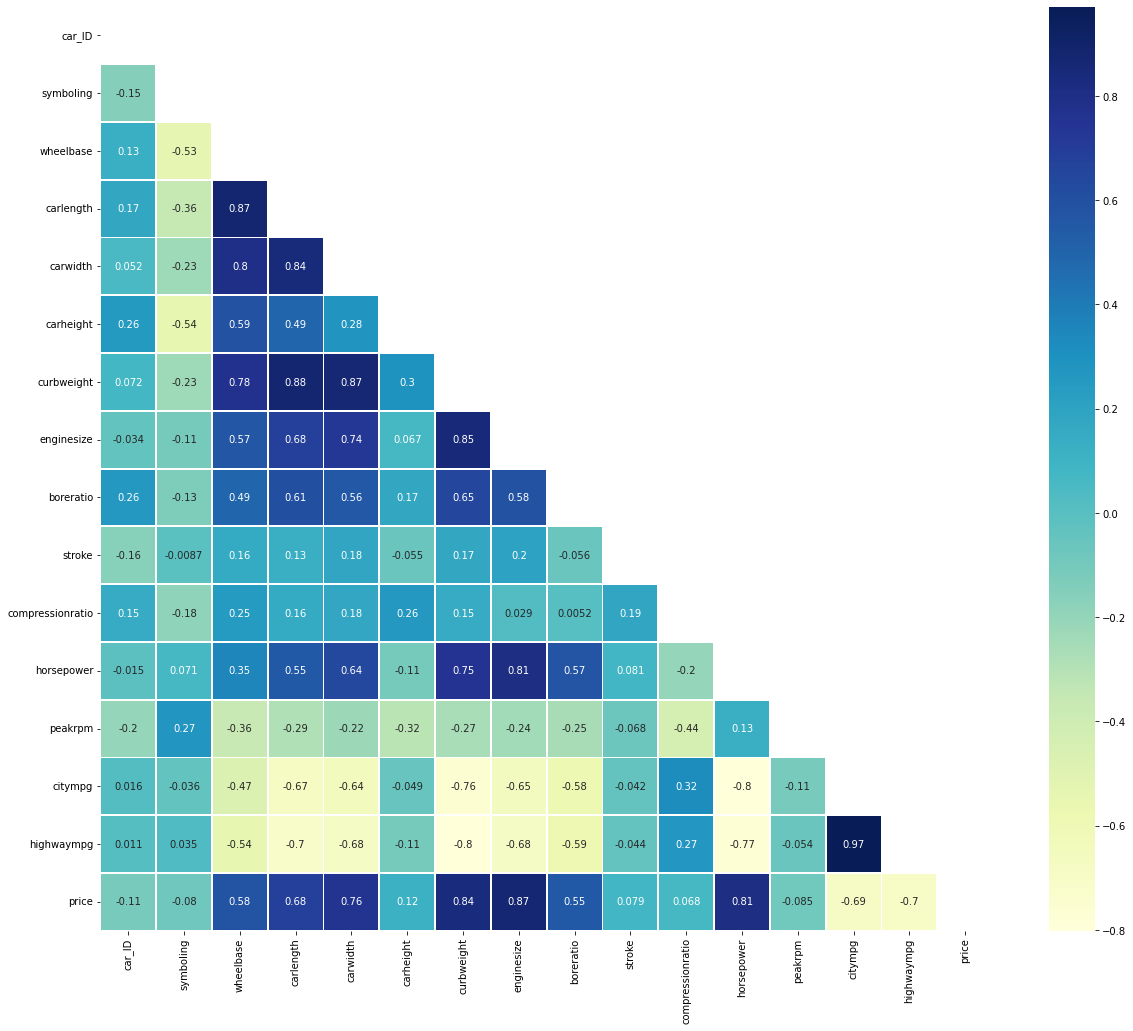

In [142]:
#Correlation using heatmap
plt.figure(figsize = (20, 17))
matrix = np.triu(car.corr())
sns.heatmap(car.corr(), annot = True, linewidth=.8, mask=matrix, cmap="YlGnBu")
plt.show()

In [143]:
car['brand']=car['CarName'].apply(lambda x: x.lower().split()[0])
car.insert(3,"Brand",car['brand'])
car.drop(['CarName'],axis=1,inplace=True)


In [144]:
car['brand'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [145]:
car.head()

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [146]:
#Checking for duplicates
car.loc[car.duplicated()]

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand


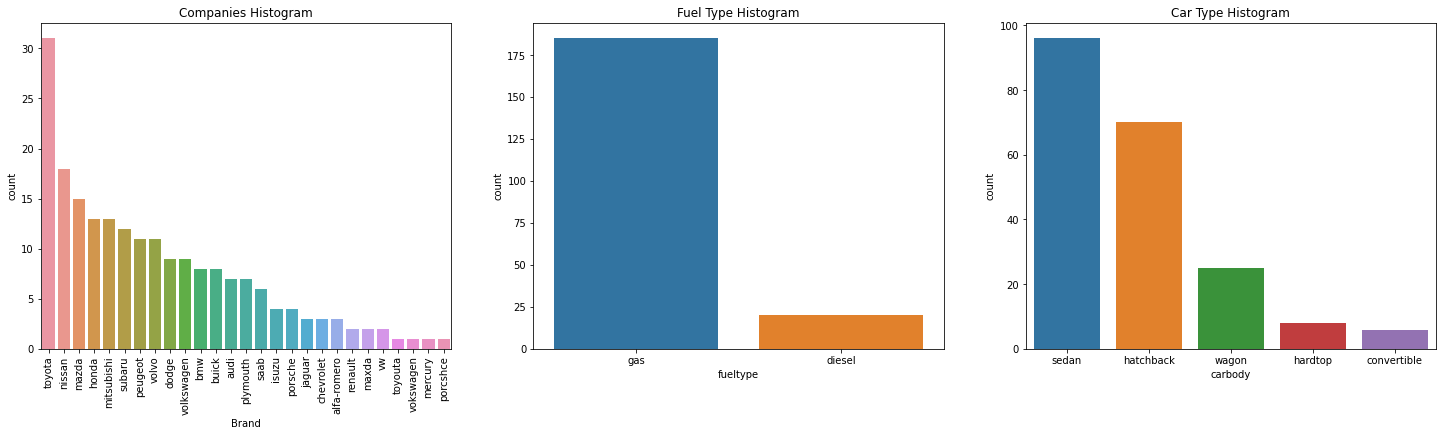

In [147]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt.xticks(rotation = 90)
order = car['Brand'].value_counts(ascending=False).index
sns.countplot(x='Brand', data=car, order=order)
plt.title('Companies Histogram')

plt.subplot(1,3,2)
order = car['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=car, order=order)
plt.title('Fuel Type Histogram')

plt.subplot(1,3,3)
order = car['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=car, order=order)
plt.title('Car Type Histogram')

plt.show()

In [148]:
num_feature=[ 'wheelbase', 'carlength', 'carwidth', 
             'carheight', 'curbweight',  'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

cat_feature=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
             'enginetype', 'fuelsystem','symboling', 'doornumber', 'cylindernumber']

In [149]:
car_num = pd.DataFrame()
for i in num_feature:
  car_num[i] = car[i]
car_num['price'] = car['price']
car_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [150]:
car_cat = pd.DataFrame()
for i in cat_feature:
  car_cat[i] = car[i]
car_cat['price'] = car['price']
car_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,symboling,doornumber,cylindernumber,price
0,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,13495.0
1,gas,std,convertible,rwd,front,dohc,mpfi,3,two,four,16500.0
2,gas,std,hatchback,rwd,front,ohcv,mpfi,1,two,six,16500.0
3,gas,std,sedan,fwd,front,ohc,mpfi,2,four,four,13950.0
4,gas,std,sedan,4wd,front,ohc,mpfi,2,four,five,17450.0


In [151]:
dummies = pd.get_dummies(car[cat_feature])

car_data = pd.concat([car[num_feature+['price']], dummies], axis=1)
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,doornumber_four,doornumber_two,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,3,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
num_vars = num_feature + ['price']
car_data[num_vars] = scaler.fit_transform(car_data[num_vars])

X = car_data.drop('price', axis=1)
y = car_data['price']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [163]:
#LinearRegression
ln = LinearRegression()
ln.fit(X_train, y_train)
pred_ln = ln.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, pred_ln))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ln)))
print('ACC: ',ln.score(X_train, y_train))

MSE: 0.15851421836969862
RMSE: 0.39813844121071584
ACC:  0.9476416372236126


In [162]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 19,
        21])}

In [161]:
#KNN

model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

pred_knn=grid_result.best_estimator_.predict(X_test)
print('R2 score:', r2_score(y_test, pred_knn))
print('MSE score:', mean_squared_error(y_test, pred_knn))
print('Accuracy score:', grid_result.score(X_train,y_train))


Best: 0.788135 using {'n_neighbors': 1}
R2 score: 0.9308651731205829
MSE score: 0.08593518747420668
Accuracy score: 0.997307423813973


In [159]:
#SVR
param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}
svm = SVR()
svm_cv = GridSearchCV(svm, param, cv=5)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)
print("Best: %f using %s" % (svm_cv.best_score_, svm_cv.best_params_))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('ACC: ',svm_cv.score(X_train, y_train))

Best: 0.886379 using {'C': 10, 'kernel': 'poly'}
MSE: 0.20130862039709252
RMSE: 0.44867429210630344
ACC:  0.9883290936646666
